In [1]:
# Importe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report

In [2]:
song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

In [58]:
# Genres anschauen und dort die häufigsten Wörter rausanalyiseren
#tbd


# Für ein Lied die häufigsten Wörter und die drei hufigsten Wörter wieder mit Genre mappen

# count-list-items-1.py
"""
wordstring = 'it starts with pain followed by hate fueled by the endless questions no one can answer '
wordstring += 'a stain covers your heart and tears you apart just like a sleeping cancer'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

# count-list-items-1.py

wordstring = 'it starts with pain followed by hate fueled by the endless questions no one can answer '
wordstring += 'a stain covers your heart and tears you apart just like a sleeping cancer'
wordlist = wordstring.split()

wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

"""

# Given a list of words, return a dictionary of
# word-frequency pairs.

def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

# Sort a dictionary of word-frequency pairs in
# order of descending frequency.

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves',"it's", "i'm","i'll"," "]

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\cleanedData.csv')

song_data['Most_Common_Word_1'] = ""
song_data['Most_Common_Word_2'] = ""
song_data['Most_Common_Word_3'] = ""

song_data = song_data[["Genre","song_text_processed","Most_Common_Word_1","Most_Common_Word_2","Most_Common_Word_3"]]
song_data = song_data.groupby('Genre').sample(100).reset_index(drop=True)

for index in range(500):  # Annahme: Es gibt mindestens 50 Zeilen
    # Verarbeite jede Zeile
    fullwordlist = song_data["song_text_processed"][index].split()
    wordlist = removeStopwords(fullwordlist, stopwords)
    dictionary = wordListToFreqDict(wordlist)
    sorteddict = sortFreqDict(dictionary)
    
    """
    # Drucke nur die drei häufigsten Wörter aus
    print(f"Zeile {index + 1} - Top 3 Wörter:")
    for freq, word in sorteddict[:3]:  # Nimm die ersten 3 Einträge aus der sortierten Liste
        print(f"{word}: {freq}")
    print("\n")
    """

    for i, (freq, word) in enumerate(sorteddict[:3]):
        song_data.at[index, f'Most_Common_Word_{i+1}'] = word


In [59]:
song_data['Genre'].value_counts()

Genre
Country       100
Electronic    100
Folk          100
Hip-Hop       100
Indie         100
Jazz          100
Metal         100
Pop           100
R&B           100
Rock          100
Name: count, dtype: int64

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

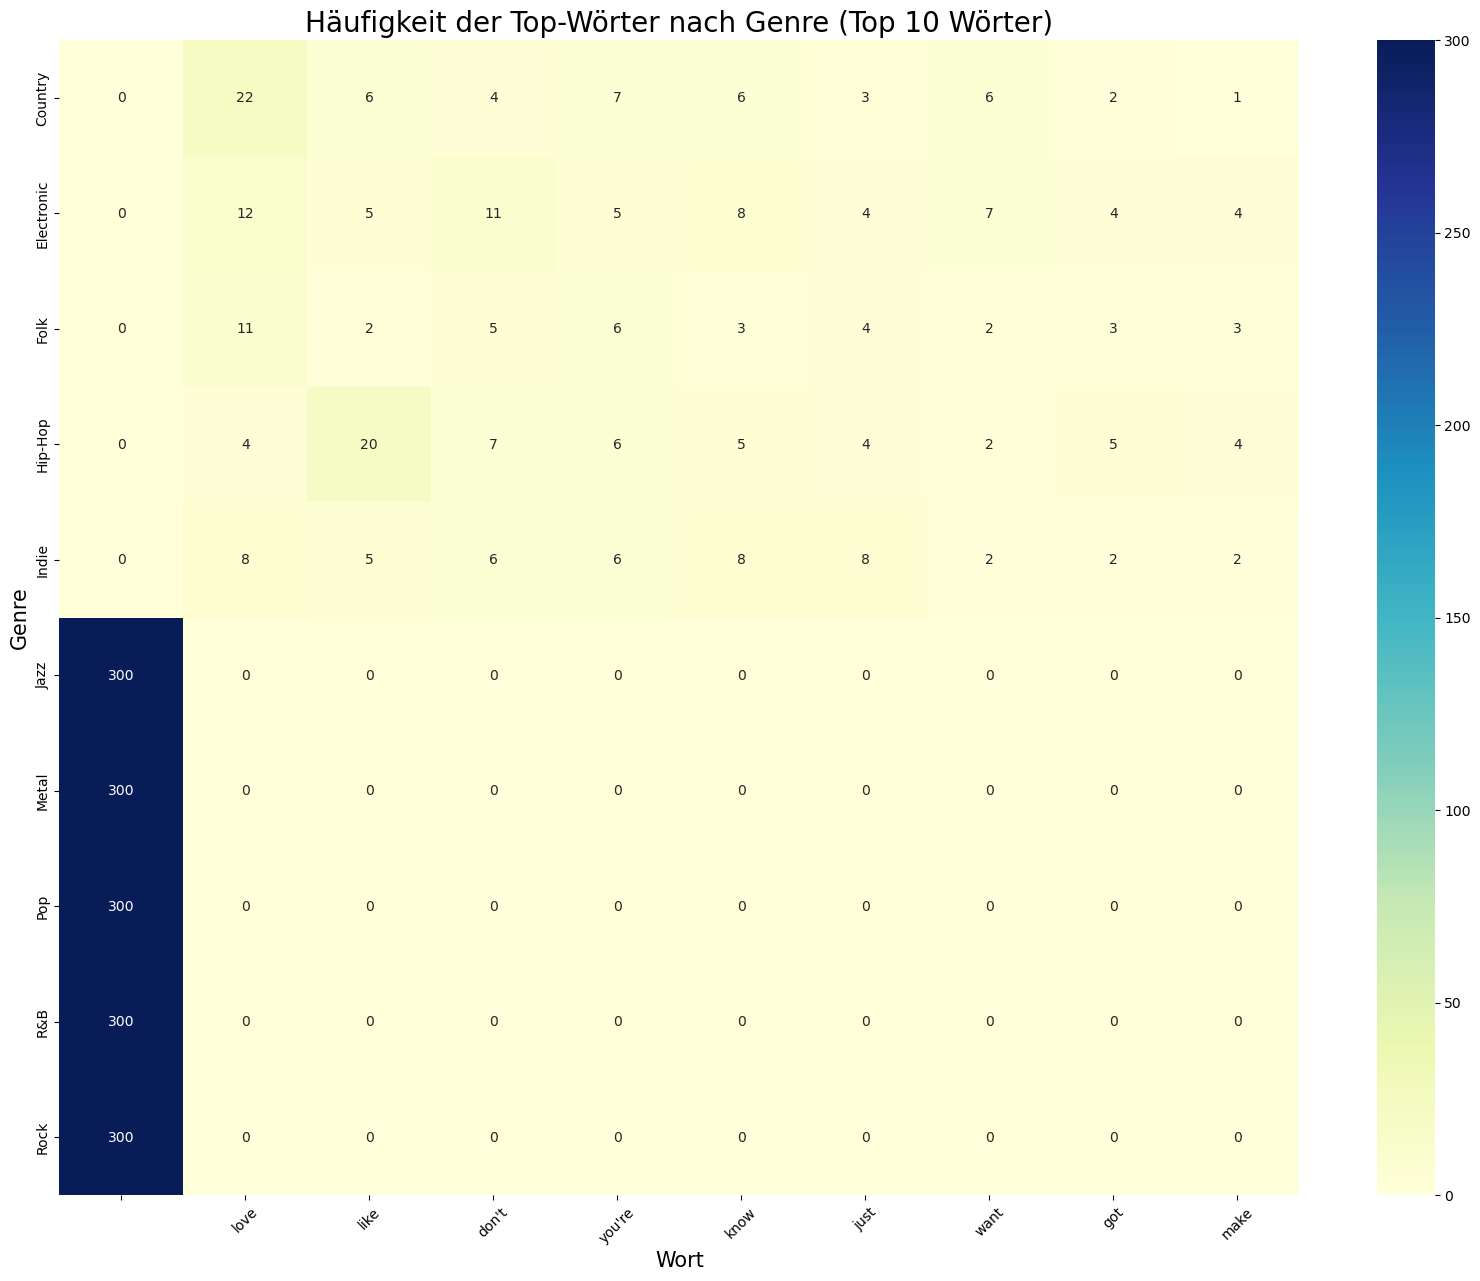

In [61]:
# Angenommen, deine DataFrame heißt df und hat Spalten: 'genre', 'Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3'

# Melte die DataFrame, sodass wir eine lange Form erhalten, mit einer Zeile für jedes Wort-Genre-Paar
melted_song_data = song_data.melt(id_vars=["Genre"], value_vars=["Most_Common_Word_1", "Most_Common_Word_2", "Most_Common_Word_3"], var_name="Common_Word_Rank", value_name="Word")

# Gruppiere nach 'genre' und 'Word', um die Häufigkeit jedes Worts in jedem Genre zu zählen
word_genre_counts = melted_song_data.groupby(["Genre", "Word"]).size().unstack(fill_value=0)

# Visualisiere die resultierende Matrix als Heatmap
top_n = 10  # Anzahl der Top-Wörter, die pro Genre angezeigt werden sollen
top_words = word_genre_counts.sum(axis=0).sort_values(ascending=False).head(top_n).index  # Finde die Top-N-Wörter über alle Genres
filtered_word_genre_counts = word_genre_counts[top_words]  # Filtere die Matrix, um nur diese Wörter anzuzeigen

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_word_genre_counts, annot=True, cmap="YlGnBu", fmt="d", annot_kws={"size": 10})
plt.title('Häufigkeit der Top-Wörter nach Genre (Top ' + str(top_n) + ' Wörter)', fontsize=20)
plt.ylabel('Genre', fontsize=15)
plt.xlabel('Wort', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [62]:
# Angenommen, word_genre_counts ist der DataFrame, der die Häufigkeit jedes Wortes in jedem Genre zeigt.
# Die Zeilen entsprechen den Genres und die Spalten den Wörtern.

top_10_words_per_genre = {}  # Ein Dictionary, um die Top-10-Wörter für jedes Genre zu speichern

for genre in word_genre_counts.index:
    # Sortiere die Wörter für das aktuelle Genre nach ihrer Häufigkeit in absteigender Reihenfolge
    top_words = word_genre_counts.loc[genre].sort_values(ascending=False).head(10)
    # Speichere die Top-10-Wörter und ihre Häufigkeiten im Dictionary
    top_10_words_per_genre[genre] = top_words

# Optional: Ausgabe der Top-10-Wörter für jedes Genre
for genre, words in top_10_words_per_genre.items():
    print(f"Genre: {genre}")  # Achte darauf, die lokale Schleifenvariable 'genre' hier zu verwenden
    for word, count in words.items():
        print(f"  {word}: {count}")
    print("\n")  # Fügt eine Leerzeile zwischen den Genres ein


Genre: Country
  love: 22
  you're: 7
  know: 6
  want: 6
  like: 6
  old: 5
  can't: 5
  little: 5
  don't: 4
  need: 4


Genre: Electronic
  love: 12
  don't: 11
  know: 8
  want: 7
  let: 6
  you're: 5
  feel: 5
  like: 5
  just: 4
  make: 4


Genre: Folk
  love: 11
  you're: 6
  don't: 5
  time: 5
  oh: 5
  just: 4
  we're: 4
  there's: 4
  little: 3
  night: 3


Genre: Hip-Hop
  like: 20
  nigga: 9
  don't: 7
  niggas: 6
  you're: 6
  im: 6
  know: 5
  got: 5
  make: 4
  tell: 4


Genre: Indie
  love: 8
  know: 8
  just: 8
  yeah: 7
  you're: 6
  don't: 6
  like: 5
  wanna: 5
  need: 4
  time: 4


Genre: Jazz
  : 300
  second: 0
  send: 0
  sense: 0
  sent: 0
  sermon: 0
  sermon]: 0
  service: 0
  set: 0
  sexy: 0


Genre: Metal
  : 300
  second: 0
  send: 0
  sense: 0
  sent: 0
  sermon: 0
  sermon]: 0
  service: 0
  set: 0
  sexy: 0


Genre: Pop
  : 300
  second: 0
  send: 0
  sense: 0
  sent: 0
  sermon: 0
  sermon]: 0
  service: 0
  set: 0
  sexy: 0


Genre: R&B
  : 300
  sec

In [63]:
from collections import Counter
import pandas as pd

# Angenommen, deine DataFrame 'df' hat Spalten: 'genre', 'Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3'
# Hier fügen wir die drei Wortspalten in einem Schritt zusammen; in der Praxis würde man die originalen Songtexte verwenden

# Erstelle eine neue Spalte 'all_words' durch Zusammenfügen der Wörter aus den drei Spalten
song_data['all_words'] = song_data[['Most_Common_Word_1', 'Most_Common_Word_2', 'Most_Common_Word_3']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Gruppiere die DataFrame nach 'genre' und kombiniere alle Wörter eines Genres in einen großen String
genre_words = song_data.groupby('Genre')['all_words'].apply(lambda x: ' '.join(x)).reset_index()

# Initialisiere ein Dictionary, um die Top-10-Wörter für jedes Genre zu speichern
top_10_words_per_genre = {}

for index, row in genre_words.iterrows():
    genre = row['Genre']  # Korrekterweise 'genre' für die Variable
    words = row['all_words'].lower().split()  # Konvertiere in Kleinbuchstaben und teile in Wörter
    words = [word for word in words if word not in stopwords]  # Entferne Stopwörter
    word_counts = Counter(words)  # Zähle die Häufigkeiten der Wörter
    top_10_words = word_counts.most_common(10)  # Wähle die Top-10-Wörter aus
    top_10_words_per_genre[genre] = top_10_words  # Verwende 'genre' als Schlüssel im Dictionary

# Optional: Ausgabe der Top-10-Wörter für jedes Genre
for genre, words in top_10_words_per_genre.items():
    print(f"Genre: {genre}")  # Verwende 'genre' hier für die korrekte Ausgabe
    for word, count in words:
        print(f"  {word}: {count}")
    print("\n")  # Fügt eine Leerzeile zwischen den Genres ein



Genre: Country
  love: 22
  you're: 7
  like: 6
  know: 6
  want: 6
  little: 5
  old: 5
  can't: 5
  don't: 4
  need: 4


Genre: Electronic
  love: 12
  don't: 11
  know: 8
  want: 7
  let: 6
  you're: 5
  feel: 5
  like: 5
  just: 4
  make: 4


Genre: Folk
  love: 11
  you're: 6
  oh: 5
  time: 5
  don't: 5
  we're: 4
  just: 4
  there's: 4
  got: 3
  that's: 3


Genre: Hip-Hop
  like: 20
  nigga: 9
  don't: 7
  niggas: 6
  you're: 6
  im: 6
  got: 5
  know: 5
  tell: 4
  right: 4


Genre: Indie
  know: 8
  just: 8
  love: 8
  yeah: 7
  you're: 6
  don't: 6
  like: 5
  wanna: 5
  need: 4
  home: 4


Genre: Jazz


Genre: Metal


Genre: Pop


Genre: R&B


Genre: Rock




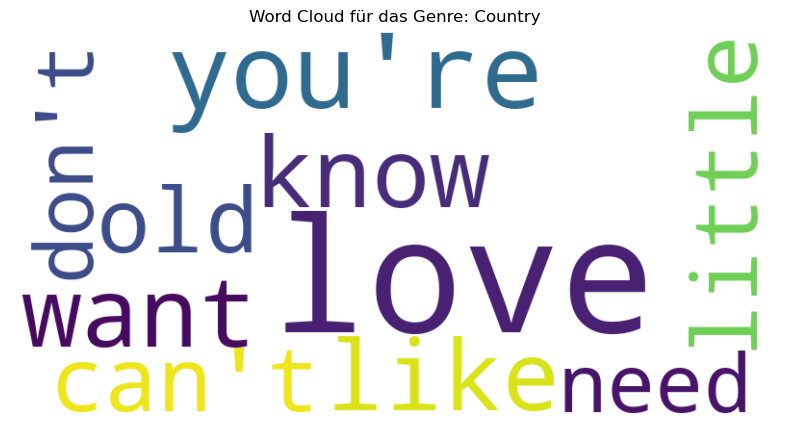

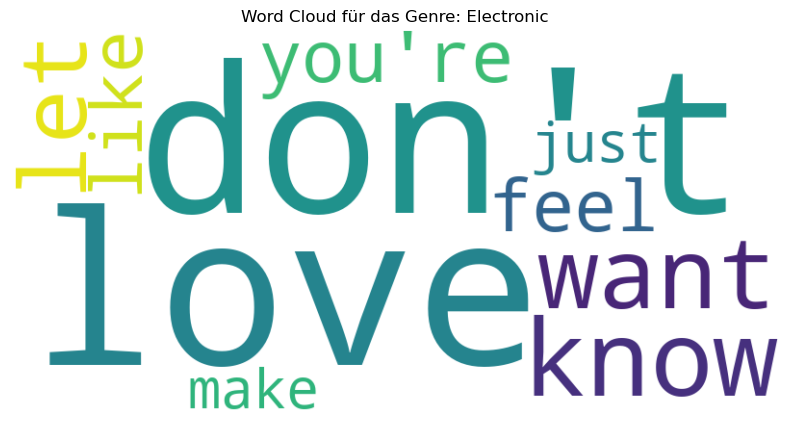

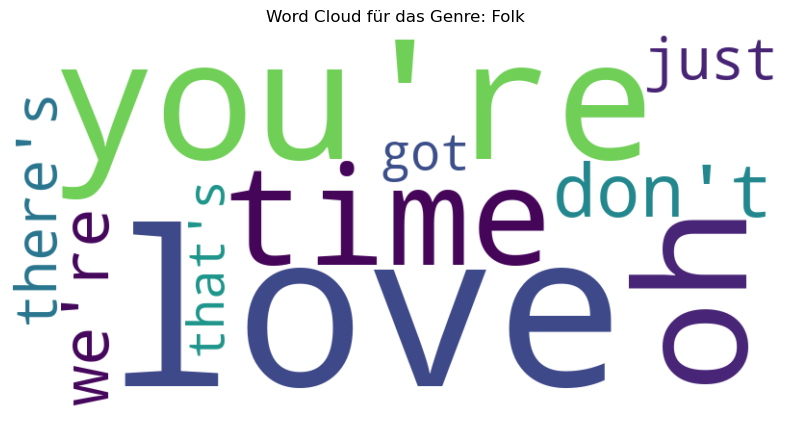

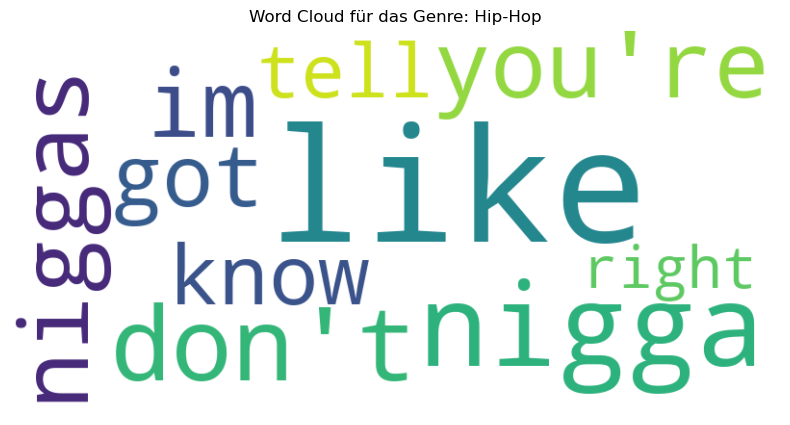

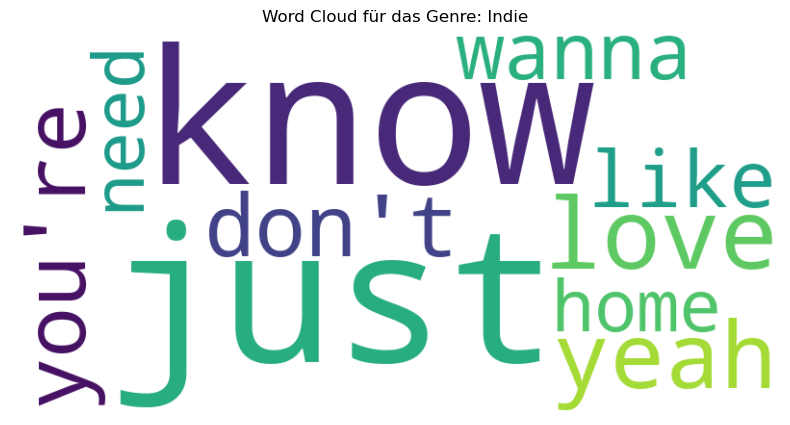

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [64]:
from wordcloud import WordCloud

for genre, frequencies in top_10_words_per_genre.items():
    # Konvertiere die Liste von Tupeln in ein Dictionary
    word_frequencies = dict(frequencies)
    
    # Erstelle eine Word Cloud für das aktuelle Genre
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    # Visualisiere die Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud für das Genre: {genre}")
    plt.show()
